<a href="https://colab.research.google.com/github/ThiagoPedrazi/MVPPuc_Sprint2/blob/MVP_PUC_ThiagoPedrazi/MVP_Sprint2B_ThiagoPedrazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sprint 2B

https://www.kaggle.com/datasets/leandrodoze/tweets-from-mgbr

In [1]:
# Modelagem de dados
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Avisos
import warnings
warnings.filterwarnings('ignore')

# configurações
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = ( 12, 6 )
plt.style.use('seaborn-darkgrid')

# Libs
import re # REGEX
import nltk # NLP

In [9]:
# Projeto B - Deep learning

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/ThiagoPedrazi/MVPPuc_Sprint2/MVP_PUC_ThiagoPedrazi/Tweets_Mg.csv"

# Lê o arquivo
Base_Dados = pd.read_csv(url, delimiter=',')

# Dimensão
Base_Dados.shape

(8199, 26)

In [10]:
# Veriicar
Base_Dados.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Modelagem & EDA (Exploração)**

## **Campos Nulos**

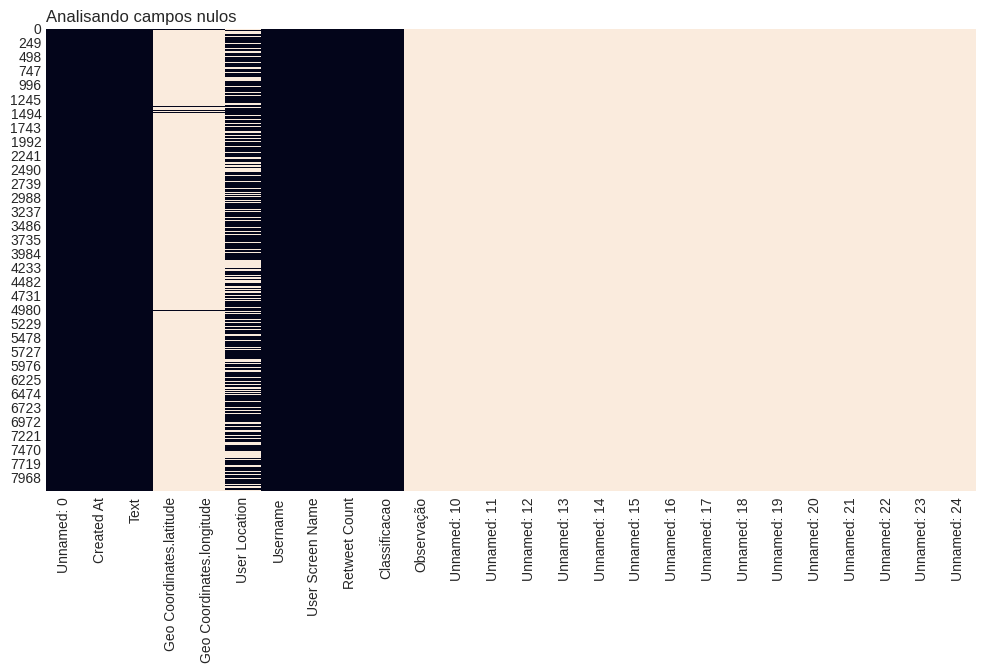

In [11]:
# campos nulos
Nulos = Base_Dados.isnull()

plt.title('Analisando campos nulos', loc='left')
sns.heatmap( Nulos, cbar=False );

In [12]:
# Colunas
Base_Dados.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [13]:
# Remover as colunas
Colunas_Extrair = Base_Dados.columns[10:]
Base_Dados.drop( columns=Colunas_Extrair, inplace=True )

In [14]:
# Dimensão
Base_Dados.shape

(8199, 10)

In [15]:
# Unicos
Base_Dados.nunique()

Unnamed: 0                   8199
Created At                   7945
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1591
Username                     3907
User Screen Name             3966
Retweet Count                 113
Classificacao                   3
dtype: int64

In [16]:
# Retirar
Base_Dados.drop( columns='Unnamed: 0', inplace=True )

# Dimensão
Base_Dados.shape

(8199, 9)

In [17]:
# Verificando
Base_Dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [18]:
# Info
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Created At                 8199 non-null   object 
 1   Text                       8199 non-null   object 
 2   Geo Coordinates.latitude   104 non-null    float64
 3   Geo Coordinates.longitude  104 non-null    float64
 4   User Location              5489 non-null   object 
 5   Username                   8199 non-null   object 
 6   User Screen Name           8199 non-null   object 
 7   Retweet Count              8199 non-null   int64  
 8   Classificacao              8199 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 576.6+ KB


## **Ajustando Data**

In [19]:
# Função
from dateutil.parser import parse

Experimento_Data = Base_Dados['Created At'][0]

print( f'Antes: {Experimento_Data}' )
print( f'Depois: { parse( Experimento_Data ).date() }' )

Antes: Sun Jan 08 01:22:05 +0000 2017
Depois: 2017-01-08


In [20]:
# Função para extrair

def Ajustar_Data( Data ):
  '''
    Função para converter Data
  '''
  # Atribuir
  Texto_Data = Data
  # Transform
  Transformacao = parse( Texto_Data )
  # Extracação
  Data_Formatada = Transformacao.date()
  return Data_Formatada

# Atribuindo função
Base_Dados['Data_Formatada'] = Base_Dados['Created At'].apply( Ajustar_Data )

# Filtro
Base_Dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08
1,Wândell,klefnews,0,Neutro,2017-01-08
2,Wândell,klefnews,0,Neutro,2017-01-08
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04
4,Emily,Milly777,0,Negativo,2017-01-09


In [21]:
# Exemplo de outra forma
Base_Dados['Created At'].apply( lambda Texto : parse(Texto).date() )

0       2017-01-08
1       2017-01-08
2       2017-01-08
3       2017-01-04
4       2017-01-09
           ...    
8194    2017-02-09
8195    2017-02-09
8196    2017-02-09
8197    2017-02-09
8198    2017-02-07
Name: Created At, Length: 8199, dtype: object

In [22]:
# Gerando Meses,Ano,Dias

# transforma data
Base_Dados['Data_Formatada'] = pd.to_datetime( Base_Dados['Data_Formatada'] )

# Extraindo
Base_Dados['Ano'] = Base_Dados['Data_Formatada'].dt.year
Base_Dados['Mes'] = Base_Dados['Data_Formatada'].dt.month
Base_Dados['Dia'] = Base_Dados['Data_Formatada'].dt.day

Base_Dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8
1,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4
4,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9


In [23]:
# Analisando
Base_Dados.groupby( by=['Ano', 'Mes'] ).agg(
    Quantidade = ('Username', 'count')
)

Quantidade
Ano  Mes            
2016 12            3
2017 1          7073
     2          1123

## **Ajustando Geo-Localização**

In [24]:
Base_Dados.isnull().sum()

Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Data_Formatada                  0
Ano                             0
Mes                             0
Dia                             0
dtype: int64

In [25]:
# Filtrando os nulos
Analise_Geo = Base_Dados.loc[
    ( Base_Dados['Geo Coordinates.latitude'].notnull() ) &
    ( Base_Dados['Geo Coordinates.longitude'].notnull() )
]

# Shape
Analise_Geo.shape

(104, 13)

In [26]:
# Verificar
Analise_Geo.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
105,Fri Jan 06 13:31:11 +0000 2017,#road #trip #mg #car #gopro @ Governador Valad...,-41.933300,-18.850000,Brasil,Heliel Braga,helielbraga,0,Neutro,2017-01-06,2017,1,6
302,Fri Jan 06 00:10:47 +0000 2017,"��❤️ @ Governador Valadares, Minas Gerais http...",-41.933300,-18.850000,Snap: duraoluiza,Luiza�,LuizaFarias9,0,Neutro,2017-01-06,2017,1,6
607,Tue Jan 10 10:47:26 +0000 2017,"bom dia! (@ LFG in Governador Valadares, Minas...",-41.940796,-18.860655,"Minas, Brasil",snap: brunolasco ♎,brunolasco,0,Neutro,2017-01-10,2017,1,10


In [27]:
# Agrupar as Geo
Analise_Localizacao = Analise_Geo.groupby( by=['Geo Coordinates.latitude', 'Geo Coordinates.longitude'] ).count()[['Username']].reset_index()

# Renomeando colunas
Analise_Localizacao.columns = ['Lat', 'Lon', 'Quantidade']

# Verificando
Analise_Localizacao.head()

,Lat,Lon,Quantidade
0,-46.643035,-22.270759,2
1,-46.627106,-23.493237,2
2,-46.616726,-21.131515,1
3,-45.523750,-22.330291,1
4,-45.236850,-19.331757,1


In [28]:
# Plot dos dados
px.density_mapbox(
    # Dados
    Analise_Localizacao,
    # LAtitude
    lat='Lat',
    # Longitude
    lon='Lon',
    # Quantidade
    z='Quantidade',
    # Estilo do mapa
    mapbox_style='stamen-terrain',
    # Centralização
    center=dict(lat=-23.700, lon=-46.555),
    # Zoom do mapa
    zoom=3,
    # Ciruclo
    radius=30
)

In [29]:
# Verificando
Base_Dados['User Location'].head(20)

0                             Brasil
1                                NaN
2                                NaN
3                                NaN
4                                NaN
5         Um Outro Mundo É Possível 
6                                NaN
7             Belo Horizonte, Brasil
8                                NaN
9                Belo Horizonte - MG
10      error 404 location not found
11              Minas Gerais, Brasil
12    Santo Antônio do Monte, Brasil
13                            BRASIL
14                               NaN
15            San Pedro Garza García
16                               NaN
17            Belo Horizonte, Brasil
18          Belo Horizonte MG Brasil
19          Belo Horizonte/MG/Brasil
Name: User Location, dtype: object

In [30]:
# Instalando o GEO PY
!pip install geopy

In [31]:
# Função
from geopy.geocoders import Nominatim

# Instanciando a função
Instanciando_Funcao = Nominatim( user_agent='GetLoc' )

In [32]:
print(f'Local: { Instanciando_Funcao.geocode("Brasil").address } ')
print(f'Latitude: { Instanciando_Funcao.geocode("Brasil").latitude }')
print(f'Longitude: { Instanciando_Funcao.geocode("Brasil").longitude }')

GeocoderUnavailable: ignored